In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [2]:
train_data.dtype, train_data.ndim, train_data.shape

(dtype('uint8'), 3, (60000, 28, 28))

In [3]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [34]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
non_norm_hist = model.fit(train_data,train_labels,epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 926us/step - loss: 2.4818 - accuracy: 0.1773 - val_loss: 1.9851 - val_accuracy: 0.2394
Epoch 2/10
1875/1875 [==============================] - 2s 819us/step - loss: 1.9254 - accuracy: 0.2607 - val_loss: 1.7678 - val_accuracy: 0.3267
Epoch 3/10
1875/1875 [==============================] - 2s 891us/step - loss: 1.6449 - accuracy: 0.3374 - val_loss: 1.5680 - val_accuracy: 0.3562
Epoch 4/10
1875/1875 [==============================] - 2s 810us/step - loss: 1.5206 - accuracy: 0.3607 - val_loss: 1.5176 - val_accuracy: 0.3621
Epoch 5/10
1875/1875 [==============================] - 2s 912us/step - loss: 1.4922 - accuracy: 0.3699 - val_loss: 1.4781 - val_accuracy: 0.3665
Epoch 6/10
1875/1875 [==============================] - 2s 816us/step - loss: 1.4688 - accuracy: 0.3799 - val_loss: 1.4985 - val_accuracy: 0.3582
Epoch 7/10
1875/1875 [==============================] - 2s 847us/step - loss: 1.4334 - accuracy: 0.3968 - val_loss: 1.4208 -

In [6]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 572us/step - loss: 1.3235 - accuracy: 0.4396


[1.3235172033309937, 0.43959999084472656]

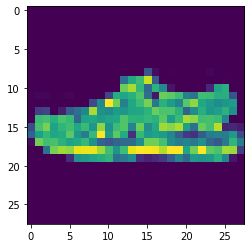

In [7]:
import matplotlib.pyplot as plt
plt.imshow(test_data[21]);

In [8]:
model.predict(test_data[22].reshape(1,28,28))

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.4994877e-04, 0.0000000e+00, 9.9923563e-01,
        1.8001418e-16, 3.1450816e-04]], dtype=float32)

In [35]:
train_ndata=train_data/255
test_ndata=test_data/255

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5,
                              min_delta=0.01,
                              mode='min',
                              min_lr=0.00001)

earlystopping = EarlyStopping(monitor='val_loss',
                             min_delta=0.0005,
                             patience=10)

filepath='./my_multiclass_model.h5'
modelcheckpoint = ModelCheckpoint(filepath=filepath, save_best_only=True)

callbacks=[earlystopping,modelcheckpoint,reduce_lr]

norm_hist = model.fit(train_ndata,train_labels,epochs=100,validation_data=(test_ndata, test_labels),callbacks=callbacks)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4911 - accuracy: 0.8251 - val_loss: 0.4167 - val_accuracy: 0.8487 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3664 - accuracy: 0.8662 - val_loss: 0.4384 - val_accuracy: 0.8451 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3338 - accuracy: 0.8772 - val_loss: 0.3757 - val_accuracy: 0.8599 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3100 - accuracy: 0.8872 - val_loss: 0.3714 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2926 - accuracy: 0.8909 - val_loss: 0.3614 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2764 - accuracy: 0.8956 - val_loss: 0.3824 - val_accuracy: 0.8562 - lr: 0.0010
Epoch 7/100
1875/1875 [=============================

In [37]:
bestmodel = tf.keras.models.load_model(filepath)
bestmodel.evaluate(test_ndata, test_labels)

313/313 [==============================] - 0s 753us/step - loss: 0.3214 - accuracy: 0.8980


[0.32136550545692444, 0.8980000019073486]

In [ ]:
model.evaluate(test_ndata, test_labels)

In [10]:
mypred = model.predict(test_ndata[21].reshape(1,28,28))
mypred, mypred.shape, mypred.ndim, tf.argmax(mypred[0])

(array([[1.4079860e-07, 8.5984702e-08, 9.4464497e-07, 3.2452113e-05,
         8.0875736e-08, 6.3804120e-01, 8.7623498e-08, 3.5658601e-01,
         5.6770234e-04, 4.7714030e-03]], dtype=float32),
 (1, 10),
 2,
 <tf.Tensor: shape=(), dtype=int64, numpy=5>)

<AxesSubplot:>

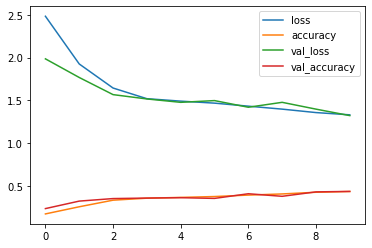

In [11]:
import pandas as pd
pd.DataFrame(non_norm_hist.history).plot()

<AxesSubplot:>

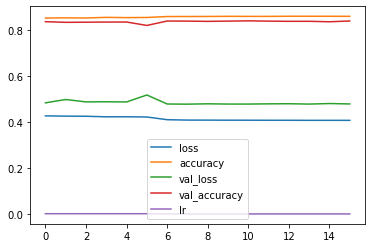

In [19]:
pd.DataFrame(norm_hist.history).plot()

In [13]:
y_pred = model.predict(test_ndata)
y_pred.shape

(10000, 10)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred = tf.argmax(y_pred,1))


array([[851,   8,  11,  42,   1,   2,  74,   0,  11,   0],
       [  6, 960,   4,  24,   3,   0,   2,   0,   1,   0],
       [ 29,   2, 690,   9, 156,   0, 109,   0,   5,   0],
       [ 44,  18,   9, 850,  30,   1,  45,   1,   2,   0],
       [  1,   1,  82,  48, 770,   0,  93,   0,   5,   0],
       [  3,   0,   0,   1,   0, 924,   0,  42,   5,  25],
       [224,   2,  95,  32, 102,   0, 530,   0,  15,   0],
       [  0,   0,   0,   0,   0,  43,   0, 924,   0,  33],
       [ 12,   0,   6,   6,   6,  16,  25,   5, 924,   0],
       [  0,   0,   0,   0,   0,  32,   0,  39,   2, 927]], dtype=int64)

In [15]:
test_labels, y_pred, tf.argmax(y_pred,1)

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8),
 array([[2.9172254e-06, 5.1070570e-09, 2.1276858e-07, ..., 1.3247527e-01,
         7.8708436e-03, 6.5877420e-01],
        [1.0857530e-04, 6.6478814e-09, 9.7292322e-01, ..., 2.0408059e-08,
         3.8256872e-04, 3.4927834e-14],
        [5.0745814e-07, 9.9975878e-01, 2.8887857e-07, ..., 3.4386507e-05,
         8.6889645e-10, 1.2264782e-07],
        ...,
        [1.2976658e-02, 1.8518611e-08, 1.5070086e-02, ..., 6.4305955e-06,
         5.1698524e-01, 6.7629855e-07],
        [1.9673305e-05, 9.8867446e-01, 1.8020772e-08, ..., 2.5249947e-05,
         9.1080770e-09, 9.8855270e-04],
        [2.1723549e-04, 7.5277367e-06, 1.0523889e-03, ..., 1.4675365e-02,
         3.2510899e-02, 1.4597038e-04]], dtype=float32),
 <tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5], dtype=int64)>)